In [262]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
# Modelling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

#### Importing data 

In [263]:
# reaadinbg the data provided in csv format from data directory
Sales_features=pd.read_csv('data/Sales_features.csv')
Sales_stores=pd.read_csv('data/Sales_stores.csv')
Sales_test=pd.read_csv('data/Sales_test.csv')
Sales_train=pd.read_csv('data/Sales_train.csv')

In [264]:
# Merging the data 

# Merging train data and sales_features 
merged_data=Sales_train.merge(Sales_features,how='inner',on=['Store','Date','IsHoliday'])

# Merging merged_sales and stores data
merged_data=merged_data.merge(Sales_stores,how='inner',on=['Store'])

merged_data.sample(10)

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
183358     19    95  2011-09-30      93808.72      False        64.99   
190340     20    26  2010-11-26      20780.22       True        46.66   
64318       7    17  2011-08-05       5583.08      False        55.91   
9580        1    81  2012-08-24      29432.75      False        77.66   
273865     28    33  2011-12-16      11386.04      False        43.29   
362457     39    95  2010-06-18     108580.58      False        83.96   
328834     34    72  2012-04-20      35169.30      False        55.34   
383773     41    13  2010-11-12      31404.83      False        38.99   
29998       4    44  2010-03-19       5212.04      False        55.19   
303450     31    27  2012-09-21        899.28      False        71.54   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
183358       3.858        NaN        NaN        NaN        NaN        NaN   
190340       3.039        NaN        NaN        NaN        NaN        NaN   
64318        3.554        NaN        NaN        NaN        NaN        NaN   
9580         3.620    6237.83     260.06       2.97    3463.03    7988.25   
273865       3.600    2429.88      18.24     347.78     573.31    6432.36   
362457       2.637        NaN        NaN        NaN        NaN        NaN   
328834       3.864    1397.43    2573.19      18.46      70.76    2761.17   
383773       2.737        NaN        NaN        NaN        NaN        NaN   
29998        2.743        NaN        NaN        NaN        NaN        NaN   
303450       3.721    9618.53      65.82      21.48    1203.78   13987.79   

               CPI  Unemployment Type    Size  
183358  136.419500         7.806    A  203819  
190340  204.962100         7.484    A  203742  
64318   193.911013         8.622    B   70713  
9580    222.171946         6.908    A  151315  
273865  129.898065        12.890    A  206302  
362457  210.210842         8.464    A  184109  
328834  131.117333         9.575    A  158114  
383773  191.041147         7.508    A  196321  
29998   126.606645         8.623    A  205863  
303450  222.416936         6.565    A  203750

In [265]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [266]:
merged_data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

 As we can see that Markdown columns has greater than than half of the data as null values,  
 we do not have enough data to analyse them hence we remove the Markdown data

In [267]:
merged_data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [268]:
merged_data.sample(10)

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
163580     17    26  2011-10-21      10113.81      False        47.27   
96643      10    12  2012-07-06       9940.25      False        86.87   
349447     37    72  2011-04-01        134.77      False        67.31   
296151     31    29  2010-10-01       3510.55      False        70.28   
251132     26    93  2011-04-08      28961.90      False        29.09   
254550     26     8  2012-03-23      26246.95      False        49.97   
387627     41     3  2011-12-02      12726.26      False        34.53   
116385     12     2  2012-06-29      77061.55      False        90.47   
158500     17     6  2010-05-21       5290.59      False        53.94   
338568     35    25  2012-05-04      13018.58      False        53.68   

        Fuel_Price         CPI  Unemployment Type    Size  
163580       3.579  129.782161         6.617    B   93188  
96643        3.666  130.719633         7.170    B  126512  
349447       3.524  213.577670         8.300    C   39910  
296151       2.603  211.329874         8.163    A  203750  
251132       3.720  134.177774         7.818    A  152513  
254550       3.889  137.655290         7.467    A  152513  
387627       3.378  195.822329         6.759    A  196321  
116385       3.875  130.756267        11.627    B  112238  
158500       2.950  126.184387         6.635    B   93188  
338568       3.951  142.017793         8.876    B  103681

In [ ]:
merged_data.to_csv('data/Merged_Sales.csv',index=False)

In [130]:
# we can see that date feature has no use with the format given hence,
# we can extract year, month, and week columns for further analysation 

merged_data['year']=merged_data['Date'].astype('datetime64[ns]').dt.year
merged_data['month']=merged_data['Date'].astype('datetime64[ns]').dt.month
merged_data['week']=merged_data['Date'].astype('datetime64[ns]').dt.isocalendar().week

merged_data.sample(10)

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
144577     15    28  2011-11-18        800.81      False        46.53   
206297     21    52  2012-08-03       2282.48      False        91.57   
125724     13    54  2012-03-16         64.80      False        52.50   
413966     45    28  2010-09-03        374.94      False        78.37   
12039       2    10  2010-07-30      40738.99      False        83.49   
323583     34    31  2010-11-26       1148.20       True        41.13   
4530        1    12  2011-04-22      13447.09      False        72.99   
269288     28    59  2010-09-17        275.41      False        82.45   
90830      10    25  2010-12-17      26393.26      False        59.15   
295656     31    38  2010-08-13      69939.10      False        89.65   

        Fuel_Price         CPI  Unemployment Type    Size  year  month  week  
144577       3.717  136.466667         7.866    B  123737  2011     11    46  
206297       3.417  221.586980         6.565    B  140167  2012      8    31  
125724       3.529  130.826193         6.104    A  219622  2012      3    11  
413966       2.715  182.604292         8.743    B  118221  2010      9    35  
12039        2.640  211.026468         8.099    A  202307  2010      7    30  
323583       2.752  126.669267        10.210    A  158114  2010     11    47  
4530         3.807  215.459905         7.682    A  151315  2011      4    16  
269288       3.028  126.145467        14.180    A  206302  2010      9    37  
90830        3.125  126.879484         9.003    B  126512  2010     12    50  
295656       2.692  211.295141         8.099    A  203750  2010      8    32

In [131]:
# drop the Date column as we no longer needed it 
merged_data.drop(['Date'],axis=1,inplace=True)

In [132]:
merged_data.week=merged_data.week.astype(int)

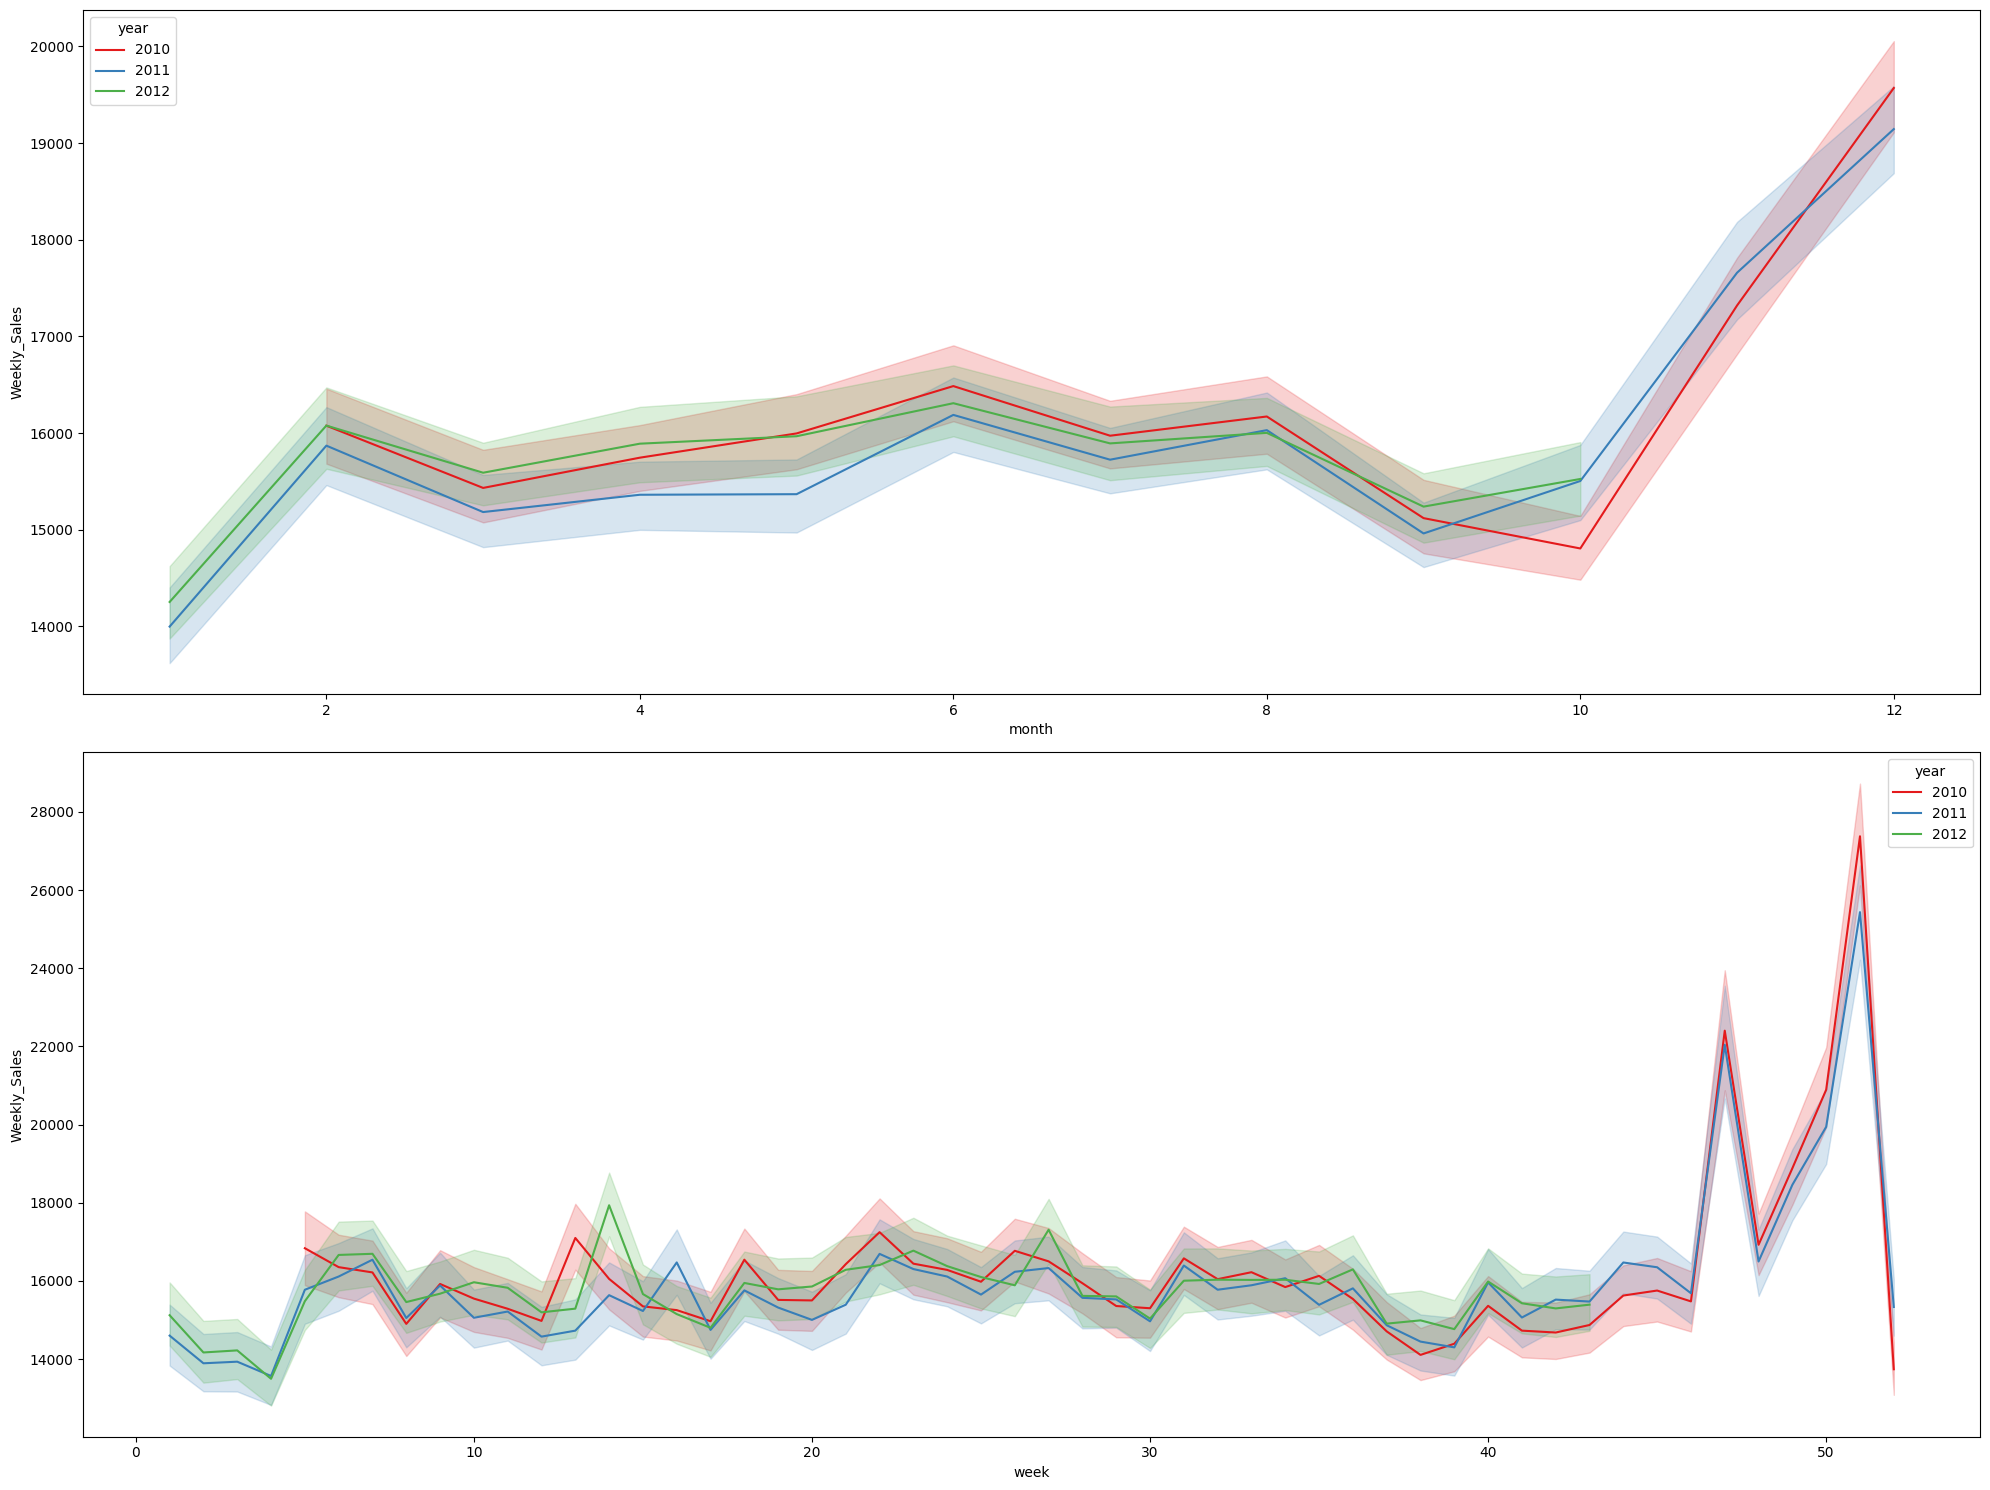

In [133]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(20,15))

sns.lineplot(x='month',y='Weekly_Sales',data=merged_data,hue='year',palette='Set1',ax=ax[0])
sns.lineplot(x='week',y='Weekly_Sales',data=merged_data,hue='year',palette='Set1',ax=ax[1])
fig.tight_layout()
plt.show()

##### Observations
- Sales in year 2010 starts from Febraury and sales in year 2012 ends in month november.
- Due to some reasons slaes in month January are quite low.
- Sales by the end of the year in moths november and december are more than average.
- Average sales of the week in every year shows the same that end of year sales are quite higher.

In [134]:
# IsHoliday has boolean values and should be converted to False->0 , True->1

merged_data['IsHoliday']=merged_data['IsHoliday'].apply(lambda x:0 if x==False else 1)

In [135]:
# same time we can generate dummies for Type column as it contains A,B,C types

dummies=pd.get_dummies(merged_data.Type,drop_first=True)
merged_data=pd.concat([merged_data,dummies.astype('int')],axis=1)
merged_data.sample(5)

Store  Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
206518     21    90      11645.53          0        77.72       3.620   
371417     40    48        512.00          0        40.54       2.834   
252225     26    94      47319.03          0        63.32       3.898   
188566     20    23      44737.27          0        72.52       2.847   
405268     44    16       1015.46          0        50.39       2.915   

               CPI  Unemployment Type    Size  year  month  week  B  C  
206518  221.808352         6.565    B  140167  2012      8    34  1  0  
371417  131.824290         5.892    A  155083  2010      3    11  0  0  
252225  135.963935         7.767    A  152513  2011      7    30  0  0  
188566  204.404288         7.856    A  203742  2010      6    22  0  0  
405268  126.562100         7.972    C   39910  2010      4    15  0  1

In [136]:
merged_data.drop(['Type'],axis=1,inplace=True)

In [137]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  int64  
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
 8   Size          421570 non-null  int64  
 9   year          421570 non-null  int32  
 10  month         421570 non-null  int32  
 11  week          421570 non-null  int32  
 12  B             421570 non-null  int32  
 13  C             421570 non-null  int32  
dtypes: float64(5), int32(5), int64(4)
memory usage: 37.0 MB


In [140]:
#merged_data.to_csv('data/MergedSales.csv',index=False)


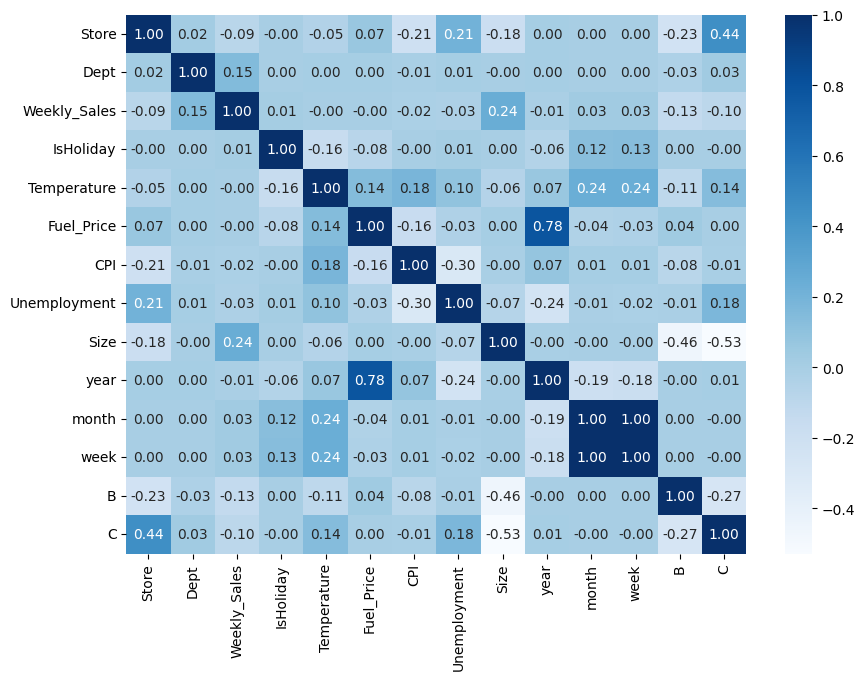

In [150]:
# looking at the correlation between the features
plt.figure(figsize=(10,7))
sns.heatmap(data=merged_data.corr(),annot=True,cmap='Blues',fmt='.2f')
plt.show()

In [182]:
num_features=['Temperature','Fuel_Price','Size','Unemployment','CPI']
cat_features=['Store','Dept','year','month','week','B','C','IsHoliday']

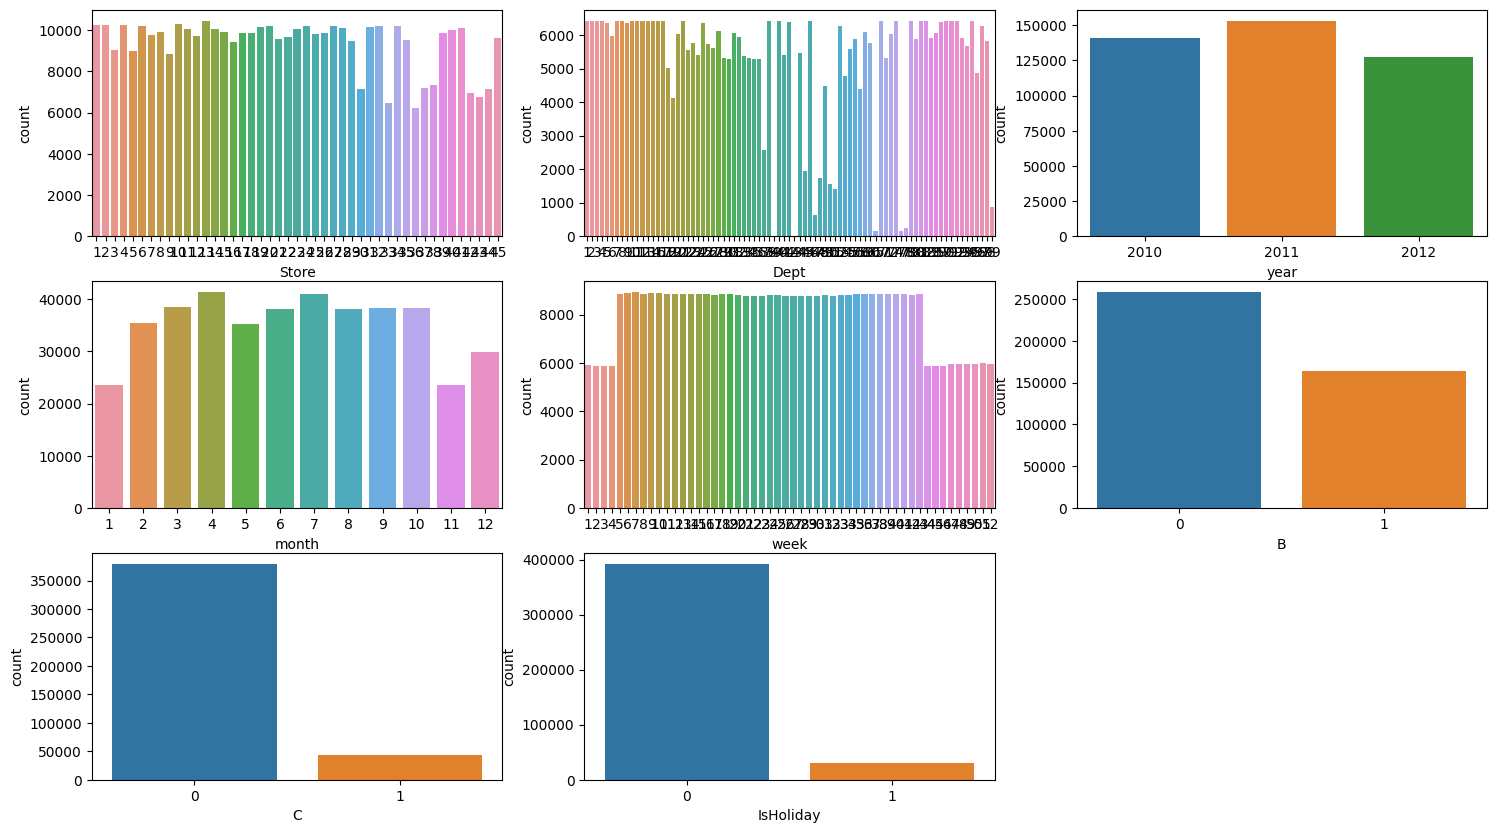

In [171]:
plt.figure(figsize=(18,10))
for i,f in enumerate(cat_features):
    plt.subplot(3,3,i+1)
    sns.countplot(x=merged_data[f],data=merged_data)

plt.show()

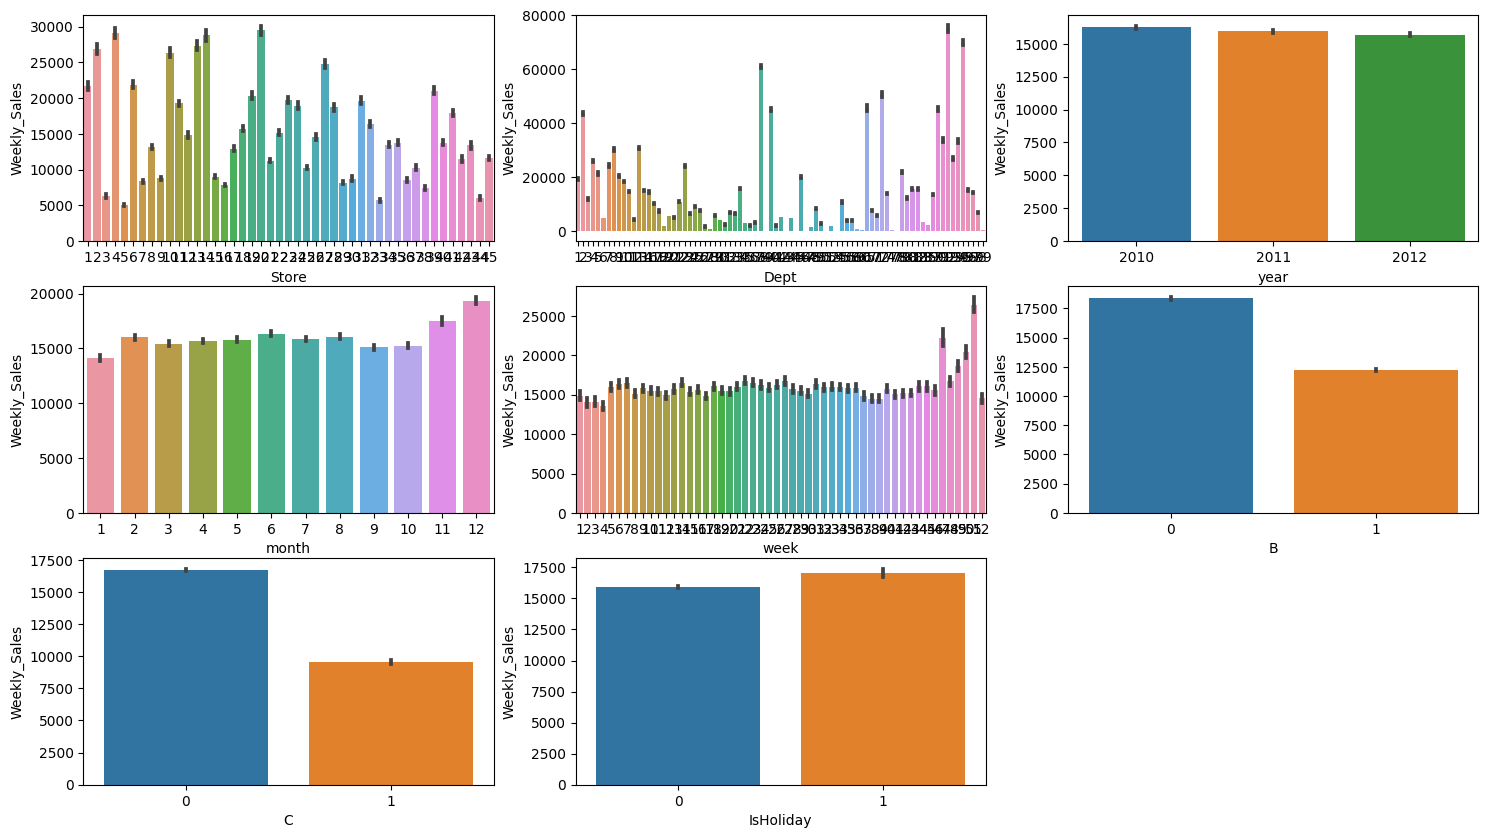

In [180]:
plt.figure(figsize=(18,10))
for i,f in enumerate(cat_features):
    plt.subplot(3,3,i+1)
    sns.barplot(x=merged_data[f],data=merged_data,y='Weekly_Sales')

plt.show()

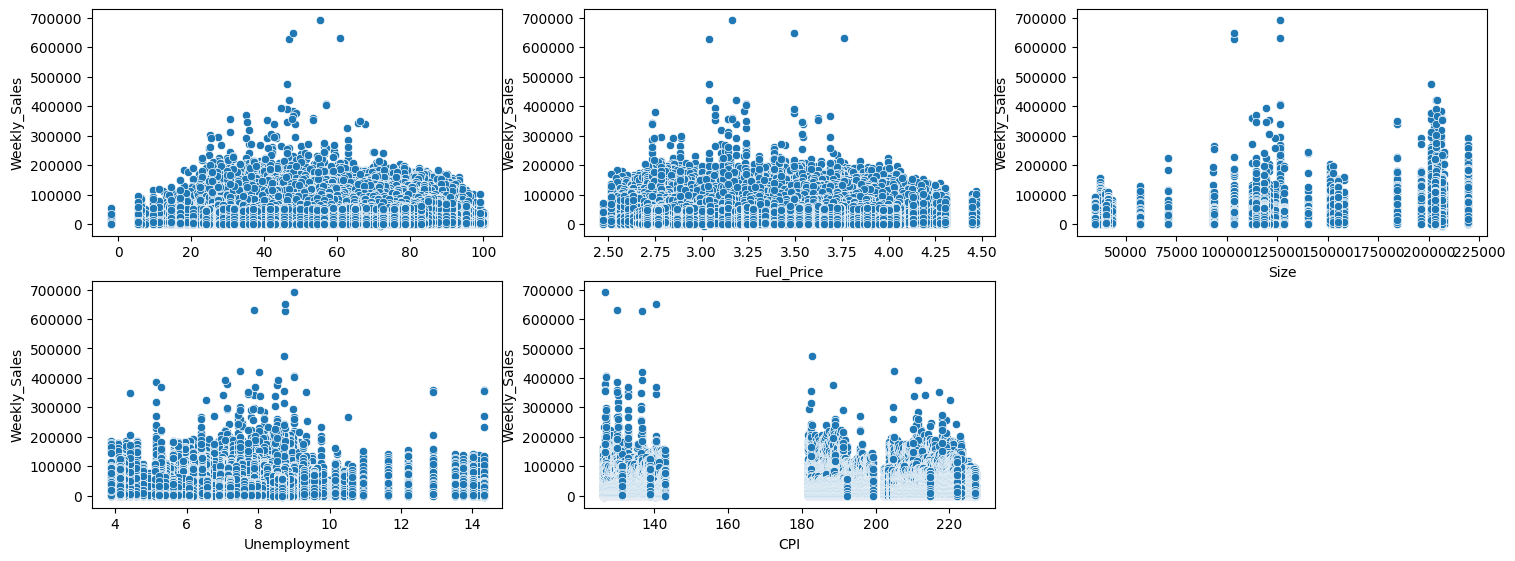

In [194]:
plt.figure(figsize=(18,10))
for i,f in enumerate(num_features):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=merged_data[f],data=merged_data,y='Weekly_Sales')

plt.show()

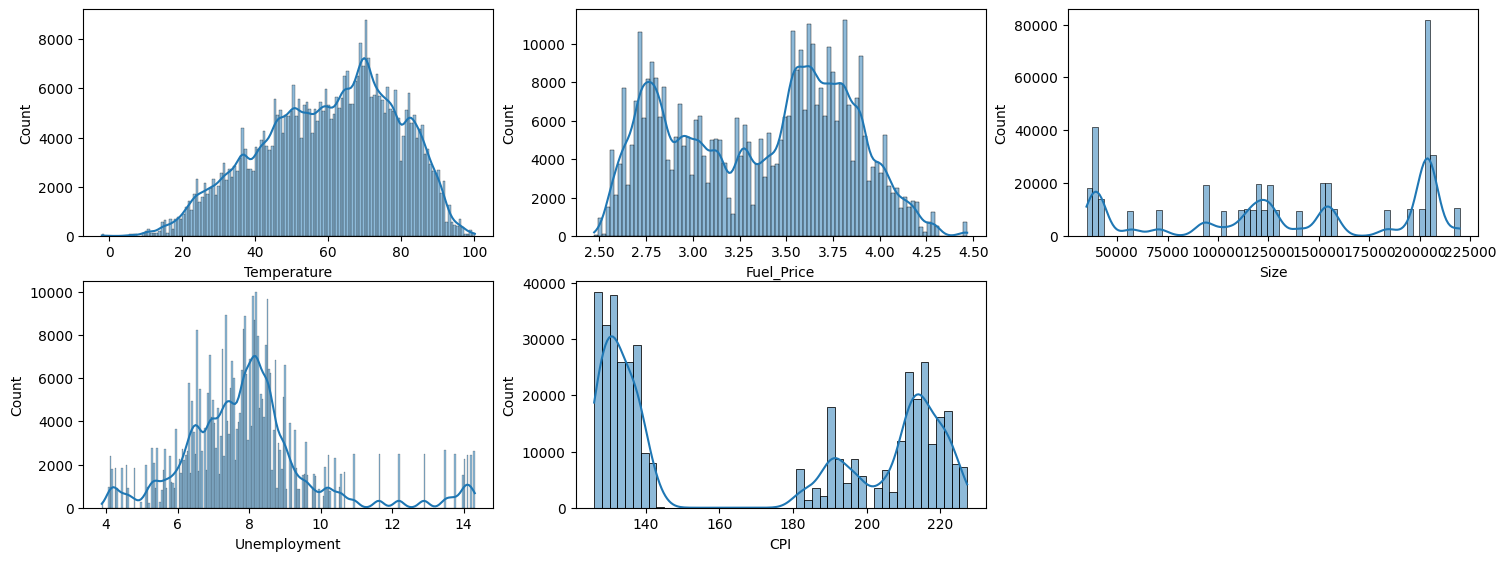

In [195]:
plt.figure(figsize=(18,10))
for i,f in enumerate(num_features):
    plt.subplot(3,3,i+1)
    sns.histplot(x=merged_data[f],data=merged_data,kde=True)
plt.show()

- Observing the values of CPI are distributed greater ot lesser than 160 hence we can categorize the feature with 1 if >160 and 0 if <160
- observing the plots of size, dept, store we can see that sales of specific numbers are quite high comparing with others this can indicate us to consider probability of those featires instead of considering the numbers

In [224]:
dff=merged_data.copy()

In [225]:
# Change the cpi column
dff.CPI=dff.CPI.apply(lambda x:0 if x<160 else 1)
dff.sample(10)

Store  Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  CPI  \
393062     42     1       9431.60          0        51.17       3.041    0   
173191     18    56       1466.47          0        60.44       3.758    0   
52158       6    32       8313.26          1        49.14       2.943    1   
121907     13    37       3739.95          0        44.69       3.407    0   
242758     25    72      27848.58          0        67.20       3.703    1   
327991     34    79      14172.24          0        39.81       3.290    0   
359195     38    67        663.85          0        53.13       3.950    0   
262301     27    67       7882.53          0        79.41       4.004    0   
62833       7     8      12480.32          0        21.84       3.232    1   
168851     18    21       5687.33          0        79.75       2.806    0   

        Unemployment    Size  year  month  week  B  C  
393062         9.003   39690  2010     12    48  0  1  
173191         8.890  120653  2011      9    38  1  0  
52158          7.007  202505  2010     12    52  0  0  
121907         7.470  219622  2011      3    11  0  0  
242758         7.274  128107  2011      9    35  1  0  
327991         9.653  158114  2012      1     4  0  0  
359195        12.187   39690  2012      2     8  0  1  
262301         7.850  204184  2011      7    30  0  0  
62833          8.818   70713  2011      3     9  1  0  
168851         9.342  120653  2010      7    27  1  0

- Convert the Store, Size, Dept fetures into probablities for better training 

In [226]:
d_size=dict(dff.Size.value_counts(normalize=True))
d_dept=dict(dff.Dept.value_counts(normalize=True))
d_store=dict(dff.Store.value_counts(normalize=True))


In [227]:
dff['Size_prob']=dff['Size'].apply(lambda x:round(d_size[x],5))
dff['Dept_prob']=dff['Dept'].apply(lambda x:round(d_dept[x],5))
dff['Store_prob']=dff['Store'].apply(lambda x:round(d_store[x],5))
dff.sample(10)

Store  Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  CPI  \
403791     43    40      15834.13          0        85.73       3.452    1   
409032     44    40      13913.05          0        68.28       3.623    0   
57336       6    59        180.31          0        70.50       3.630    1   
379658     40    24       2689.43          0        69.32       3.629    0   
65743       7     1      14835.08          1        15.56       3.119    1   
204826     21    80        110.72          0        59.30       3.630    1   
295327     31    94      67831.60          0        81.67       2.642    1   
135215     14    56       1095.04          0        41.18       3.513    1   
416748     45    90      23239.71          0        69.32       3.842    1   
305941     32    21       5713.67          0        74.95       2.731    1   

        Unemployment    Size  year  month  week  B  C  Size_prob  Dept_prob  \
403791         9.575   41062  2012      6    23  0  1    0.01601    0.01526   
409032         6.560   39910  2011      9    39  0  1    0.04886    0.01526   
57336          5.964  202505  2012      5    20  0  0    0.02422    0.01448   
379658         4.125  155083  2012      6    25  0  0    0.02376    0.01282   
65743          8.513   70713  2011     12    52  1  0    0.02316    0.01526   
204826         7.057  140167  2012      3     9  1  0    0.02273    0.01397   
295327         8.099  203750  2010      7    27  0  0    0.02406    0.01349   
135215         8.424  200898  2012      1     2  0  0    0.02382    0.01393   
416748         8.521  118221  2011      6    24  1  0    0.02286    0.01526   
305941         9.017  203007  2010      8    34  0  0    0.02420    0.01526   

        Store_prob  
403791     0.01601  
409032     0.01701  
57336      0.02422  
379658     0.02376  
65743      0.02316  
204826     0.02273  
295327     0.02406  
135215     0.02382  
416748     0.02286  
305941     0.02420

In [229]:
dff.drop(['Dept','Store','Size'],axis=1,inplace=True)

In [231]:
dff.sample(10)

Weekly_Sales  IsHoliday  Temperature  Fuel_Price  CPI  Unemployment  \
127194     118880.78          0        81.99       3.512    0         5.765   
24550        4079.36          0        78.69       3.810    1         7.574   
64085          20.31          0        59.08       3.540    1         8.622   
132145      17844.38          0        45.01       3.582    1         8.549   
92704       23407.53          0        87.96       3.935    0         8.494   
74321        2269.20          0        82.92       3.554    1         6.425   
344510      10653.74          0        58.31       3.133    1         7.716   
205526      12486.35          0        72.42       3.630    1         6.891   
203350      15926.24          0        71.64       3.285    1         7.441   
128040      20822.13          0        46.97       3.755    0         5.621   

        year  month  week  B  C  Size_prob  Dept_prob  Store_prob  
127194  2012      8    31  0  0    0.02485    0.01526     0.02485  
24550   2011      4    17  1  0    0.02143    0.01413     0.02143  
64085   2011      7    27  1  0    0.02316    0.01448     0.02316  
132145  2011      3    10  0  0    0.02382    0.01384     0.02382  
92704   2011      6    24  1  0    0.02447    0.01507     0.02447  
74321   2011      8    33  0  0    0.02347    0.01255     0.02347  
344510  2011     12    50  0  0    0.04886    0.01526     0.01476  
205526  2012      5    20  1  0    0.02273    0.01526     0.02273  
203350  2011     10    40  1  0    0.02273    0.01526     0.02273  
128040  2012     10    43  0  0    0.02485    0.01263     0.02485

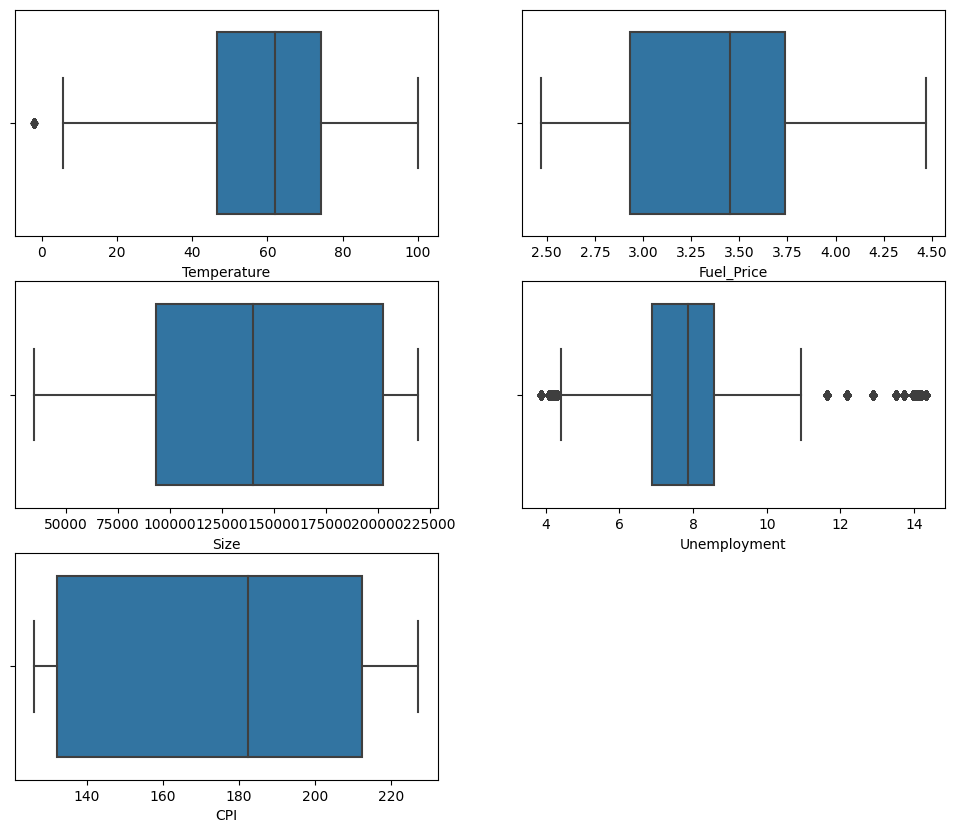

In [223]:
plt.figure(figsize=(12,10))
for i,f in enumerate(num_features):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=merged_data[f],data=merged_data)
plt.show()

### Model Building 

In [251]:
X=dff.drop(['Weekly_Sales'],axis=1)
y=dff['Weekly_Sales']

In [252]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [253]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((295099, 13), (126471, 13))

#### Create an Evaluating Function to give all metrics after model Training

In [254]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2_square = r2_score(actual, predicted)
    return mae, rmse, r2_square

In [255]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "HistGB Regressor" : HistGradientBoostingRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 20928.0313
- Mean Absolute Error: 13800.8765
- R2 Score: 0.1433
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 21233.0857
- Mean Absolute Error: 13853.7739
- R2 Score: 0.1436


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 18587.5809
- Mean Absolute Error: 11218.9685
- R2 Score: 0.3242
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 20990.6142
- Mean Absolute Error: 12834.1767
- R2 Score: 0.1630


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 14484.1602
- Mean Absolute Error: 6244.7472
- R2 Score: 0.5896
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 16122.6992
- Mean Absolute Error: 7773.4574
- R2 Score: 0.5062


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 14521.4

In [256]:
# Values of every model get the best 
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model Name  R2_Score
5    CatBoosting Regressor  0.551744
4             XGBRegressor  0.549888
6         HistGB Regressor  0.544559
3  Random Forest Regressor  0.520469
2            Decision Tree  0.506213
1    K-Neighbors Regressor  0.163021
0        Linear Regression  0.143573

### CatBoosting Regressor

In [257]:
cbr=CatBoostRegressor()
param_grid = {
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
}

grid=GridSearchCV(cbr,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)
best_params=grid.best_params_
print(best_params)


0:	learn: 22477.1384618	total: 22.3ms	remaining: 22.3s
1:	learn: 22409.4157917	total: 42.5ms	remaining: 21.2s
2:	learn: 22341.8617580	total: 64.7ms	remaining: 21.5s
3:	learn: 22275.4531720	total: 86.1ms	remaining: 21.4s
4:	learn: 22210.4455333	total: 106ms	remaining: 21.1s
5:	learn: 22146.9416881	total: 205ms	remaining: 33.9s
6:	learn: 22083.7197084	total: 228ms	remaining: 32.4s
7:	learn: 22022.8633624	total: 252ms	remaining: 31.2s
8:	learn: 21963.1203653	total: 288ms	remaining: 31.7s
9:	learn: 21903.7622501	total: 308ms	remaining: 30.5s
10:	learn: 21847.1015950	total: 329ms	remaining: 29.6s
11:	learn: 21790.2588362	total: 348ms	remaining: 28.7s
12:	learn: 21734.2289178	total: 370ms	remaining: 28.1s
13:	learn: 21678.8289430	total: 390ms	remaining: 27.5s
14:	learn: 21624.7625707	total: 410ms	remaining: 26.9s
15:	learn: 21571.1351611	total: 429ms	remaining: 26.4s
16:	learn: 21517.2851056	total: 448ms	remaining: 25.9s
17:	learn: 21464.3754974	total: 467ms	remaining: 25.5s
18:	learn: 21413

In [261]:
cbr=CatBoostRegressor(**best_params)
cbr = cbr.fit(X_train, y_train)
y_pred = cbr.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

0:	learn: 21922.3626493	total: 83.8ms	remaining: 1m 23s
1:	learn: 21349.1847728	total: 133ms	remaining: 1m 6s
2:	learn: 20861.9664834	total: 177ms	remaining: 59s
3:	learn: 20412.3895725	total: 224ms	remaining: 55.9s
4:	learn: 20076.2900603	total: 266ms	remaining: 53s
5:	learn: 19798.6608480	total: 321ms	remaining: 53.2s
6:	learn: 19444.9127577	total: 395ms	remaining: 56s
7:	learn: 19242.1074677	total: 444ms	remaining: 55.1s
8:	learn: 19066.5427628	total: 496ms	remaining: 54.6s
9:	learn: 18882.8178453	total: 556ms	remaining: 55.1s
10:	learn: 18759.1714452	total: 602ms	remaining: 54.1s
11:	learn: 18653.7535980	total: 649ms	remaining: 53.4s
12:	learn: 18407.1395805	total: 710ms	remaining: 53.9s
13:	learn: 18252.7326014	total: 763ms	remaining: 53.8s
14:	learn: 18187.6466822	total: 843ms	remaining: 55.4s
15:	learn: 18120.7058835	total: 914ms	remaining: 56.2s
16:	learn: 17952.6634001	total: 983ms	remaining: 56.8s
17:	learn: 17816.3241270	total: 1.04s	remaining: 56.6s
18:	learn: 17773.3793186